***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [3]:
dados.head(10)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

### 2º Definir os labels das classes

In [5]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [6]:
frequencia = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        labels = labels,
        bins = classes,
        include_lowest = True
    )
)
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [7]:
percentual = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        labels = labels,
        bins = classes,
        include_lowest = True,
    ),
    normalize = True
) * 100
percentual

E    64.751432
D    21.733472
C     9.889381
B     2.834461
A     0.791255
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [8]:
dist_freq_renda = pd.DataFrame({'Frequência': frequencia, 'Percentagem (%)': percentual})
dist_freq_renda.sort_index(ascending= False)

,Frequência,Percentagem (%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<AxesSubplot:>

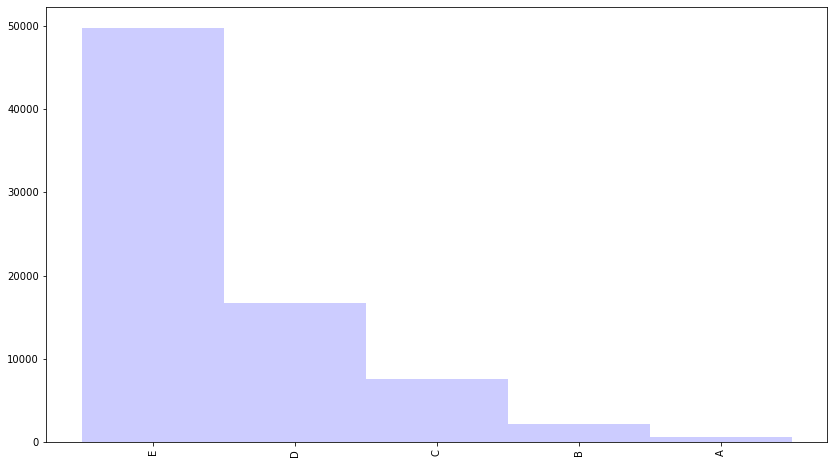

In [9]:
dist_freq_renda['Frequência'].plot.bar(width = 1, color = 'blue', alpha = 0.2, figsize = (14, 8))

> ### Conclusões

#### Ao se analisar a Distribuição de Frequência da variável "Renda", pode-se obter as seguintes conclusões:
* Menos de 1% da população, provedora do lar, amostrada estão na classe A. Com uma frequência igual a 608 observações;
* Mais de 80% da população, provedora do lar, amostrada estão na classe E e D;
* A maior concertação da população está na classe E, com frequência superior a 4900, indicando que cerca de 64% da amostragem populacional vive com menos de 2 salários mínimos;
* O gráfico de barras indica que a relação entre maiores salários e a população presentes nessas classes são negativamente correlacionadas, ou seja, conforme sobe a renda do provedor da familia menor e a frequência de pessoas nessas maiores classes

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

C:\Users\jccds\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências - Altura'}, xlabel='Metros'>

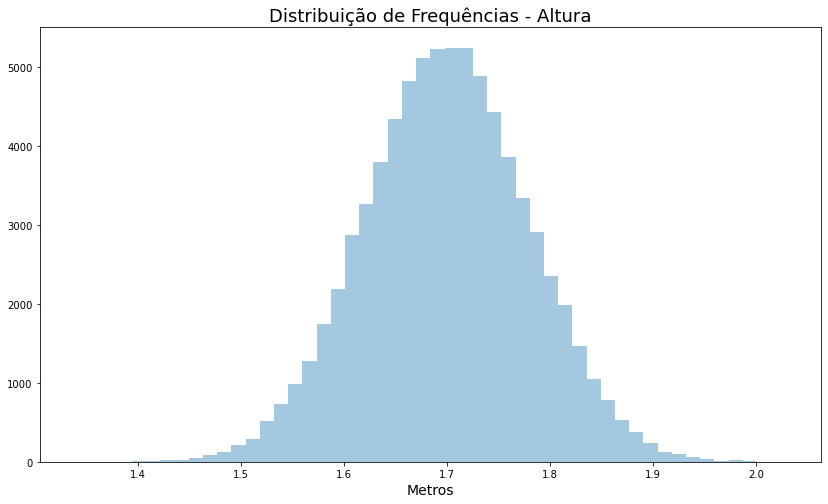

In [10]:
ax = sns.distplot(dados.Altura, kde = False)

ax.figure.set_size_inches(14, 8)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<AxesSubplot:title={'center':'Distribuição de Frequências - Idade'}, xlabel='Anos'>

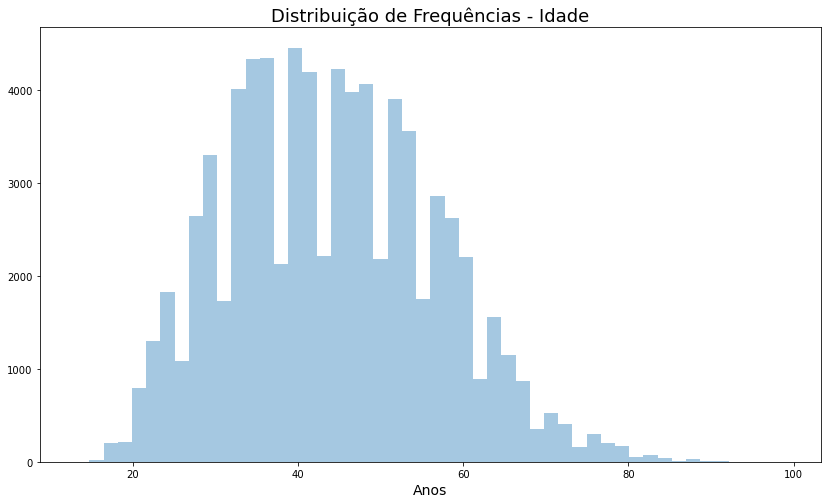

In [11]:
ax = sns.distplot(dados.Idade, kde = False)

ax.figure.set_size_inches(14, 8)
ax.set_title('Distribuição de Frequências - Idade', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

<AxesSubplot:title={'center':'Distribuição de Frequências - Renda'}, xlabel='Reais'>

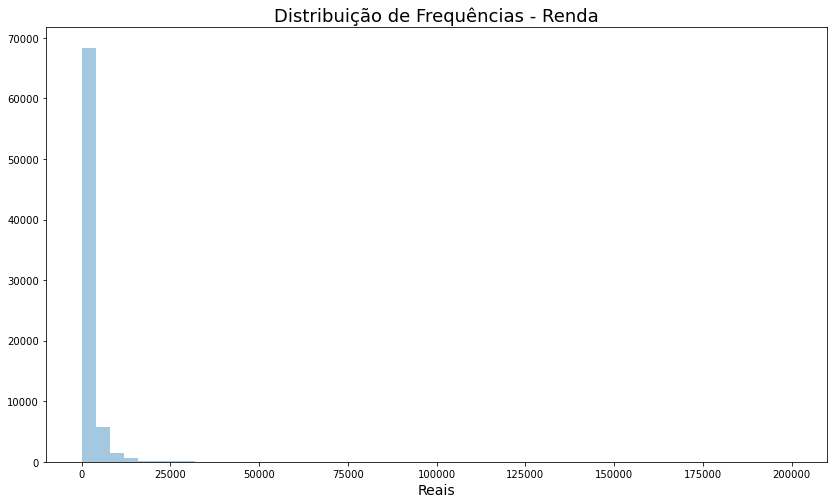

In [12]:
ax = sns.distplot(dados.Renda, kde = False)

ax.figure.set_size_inches(14, 8)
ax.set_title('Distribuição de Frequências - Renda', fontsize=18)
ax.set_xlabel('Reais', fontsize=14)
ax

> ### Conclusões

#### Ao se analisar os Histogramas das Variáveis Quantitativas (Altura, Idade e Renda), pode-se obter as seguintes conclusões:
##### Altura:
* Tem-se uma simetria quase perfeita, se não perfeita;
* A maior frequência de altura (m) está na faixa de 1,7m.
##### Idade:
* Observa-se uma assimetria à direita, não muito forte;
* Observa-se que existe uma maior frequência da população provedora do lar nas faixas de idade acima de 20 anos até próximos aos 60 anos;
* Possivelmente a assimetria à direita é ocasionado por esse fênomeno, onde pessoas de idade superior a 20 anos e inferior a 60 anos, geralmente são provedoras do lar;
##### Renda:
* Temos uma assimetria praticamente completa à direita;
* Ao se eliminar pessoas com renda superior a R$ 20000 houve um leve recuo, entretanto a assimetria continua à direita;
* Possivelmente, a causa dessa simetria se da ao fato de mais de 64% da população receber até dois salários mínimo;
* É menos de 1% da população receber acima de 25 salários mínimos;

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<AxesSubplot:title={'center':'Distribuição de Frequências - Renda'}, xlabel='Reais'>

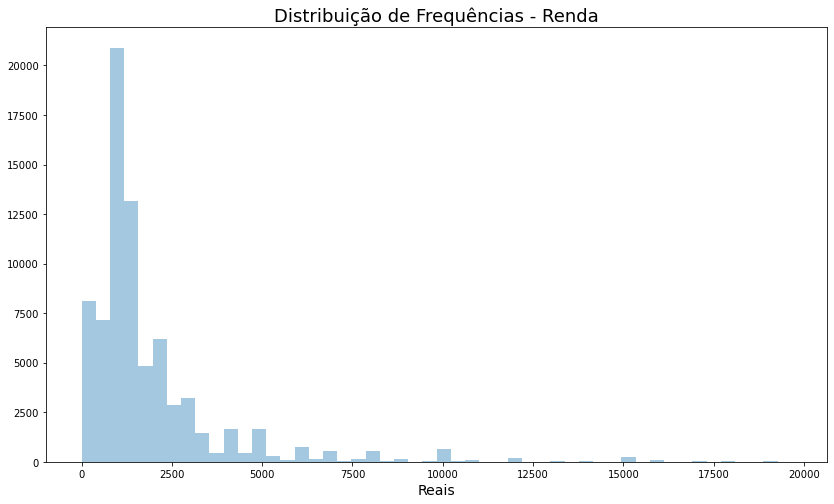

In [13]:
ax = sns.distplot(dados.query('Renda < 20000')['Renda'], kde = False)

ax.figure.set_size_inches(14, 8)
ax.set_title('Distribuição de Frequências - Renda', fontsize=18)
ax.set_xlabel('Reais', fontsize=14)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [14]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [60]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor)
frequencia.rename(index= sexo, inplace = True)
frequencia.rename(columns= cor, inplace= True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [15]:
percentual = pd.crosstab(dados.Sexo, dados.Cor, normalize= True) * 100
percentual.rename(index= sexo, inplace = True)
percentual.rename(columns= cor, inplace= True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

#### Ao se analisar a tabela de frequências e a de percentuais, cruzando das variáveis SEXO e COR, pode-se obter as seguintes conclusões:
* É percetível que em o sexo masculino, em qualquer etnia, são os que mais aparecem;
* As mulheres estão em menores percentuais no quesito sustento da familia;


## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [16]:
media = dados.Renda.mean()
print(f'A média da renda é R${media:.2f}')

A média da renda é R$2000.38


### Obtenha a mediana

In [17]:
mediana = dados.Renda.median()
print(f'A mediana da renda é R${mediana:.2f}')

A mediana da renda é R$1200.00


### Obtenha a moda

In [51]:
moda = dados.Renda.mode()
lista = []
[lista.append(moda[i]) for i in range(0, len(moda))]
print(f'A(s) moda(s) da renda em reais é(são):\n{lista}')

A(s) moda(s) da renda em reais é(são):
[788]


### Obtenha o desvio médio absoluto

In [52]:
des_med_abs = dados['Renda'].mad()
print(f'O desvio médio absoluto da renda é R${des_med_abs:.2f}')

O desvio médio absoluto da renda é R$1526.50


### Obtenha a variância

In [56]:
variancia = dados['Renda'].var()
print(f'A variância da renda é de R${variancia:.2f}')

A variância da renda é de R$11044906.01


### Obtenha o desvio-padrão

In [58]:
des_pad = dados.Renda.std()
print(f'O desvio-padrão é de R${des_pad:.2f}')

O desvio-padrão é de R$3323.39


### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [59]:
parametros_estatisticos = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         aggfunc = {'mean', 'median', 'max'},
                         values = dados.Renda).round(2)
parametros_estatisticos.rename(index = sexo, inplace = True)
parametros_estatisticos.rename(columns = cor, inplace = True)
parametros_estatisticos

max                                           mean           \
Cor        Indígena    Branca    Preta  Amarela     Parda Indígena   Branca   
Sexo                                                                          
Masculino   10000.0  200000.0  50000.0  50000.0  100000.0  1081.71  2925.74   
Feminino   120000.0  100000.0  23000.0  20000.0   30000.0  2464.39  2109.87   

                                       median                                  
Cor          Preta  Amarela    Parda Indígena  Branca   Preta Amarela   Parda  
Sexo                                                                           
Masculino  1603.86  4758.25  1659.58    797.5  1700.0  1200.0  2800.0  1200.0  
Feminino   1134.60  3027.34  1176.76    788.0  1200.0   800.0  1500.0   800.0

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [62]:
medidas_dispersao = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         aggfunc = {'mad', 'var', 'std'},
                         values = dados.Renda).round(2)
medidas_dispersao.rename(index = sexo, inplace = True)
medidas_dispersao.rename(columns = cor, inplace = True)
medidas_dispersao

mad                                          std           \
Cor       Indígena   Branca   Preta  Amarela    Parda  Indígena   Branca   
Sexo                                                                       
Masculino   798.91  2261.01  975.60  3709.60  1125.83   1204.09  4750.79   
Feminino   3007.89  1670.97  705.45  2549.15   811.58  11957.50  3251.01   

                                               var                           \
Cor          Preta  Amarela    Parda      Indígena       Branca       Preta   
Sexo                                                                          
Masculino  1936.31  5740.82  2312.09  1.449841e+06  22570023.41  3749293.59   
Feminino   1349.80  3731.17  1596.23  1.429818e+08  10569086.53  1821959.52   

                                    
Cor            Amarela       Parda  
Sexo                                
Masculino  32957069.62  5345747.15  
Feminino   13921656.88  2547959.94

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [19]:
from scipy import stats



### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

> ### Conclusões

Escreva suas conclusões aqui...